 # **PSL WINNING PRESICTION**

###The Pakistan Super League (PSL) is a T20 cricket league that attracts top players worldwide. Due to the numerous aspects that go into a teams success, it can be difficult to forecast which team will win each match. This project aims to create a model that, using past performance data, can forecast which side will win each PSL match.

## **Importing Libraries**

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra,numerical operations
import math #basic mathematical functions
from sklearn import svm #Support Vector Machine modeling
from sklearn.model_selection import train_test_split #splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier # Random Forest modeling
import xgboost# Extreme Gradient Boosting modeling
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #evaluating model performance
from sklearn.model_selection import RepeatedStratifiedKFold # cross-validation
import time #timing model fitting and evaluation
from sklearn.model_selection import cross_val_score #cross-validation of models
import joblib #oading models

# data visualization(for EDA)
import matplotlib.pyplot as plt # basic visualization
import seaborn as sns #more advanced visualization
%matplotlib inline
plt.style.use('ggplot')
sns.set(color_codes=True)
import plotly.express as px #nteractive visualization
import cufflinks as cf#nteractive visualization
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


# **Loading and Importing Data**

In [2]:
df = pd.read_csv('/content/psl_formated.csv')


#df = pd.read_csv('/content/players.csv')

#df = pd.read_csv('/content/batting.csv')
#df = pd.read_csv('/content/bowling.csv')

#df = pd.read_csv('/content/points.csv')
#df = pd.read_csv('/content/matches.csv' )



df.head()



,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket,wicket_text,result
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,NaN,NaN,Gladiators
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,NaN,NaN,Gladiators
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,NaN,NaN,Gladiators
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,NaN,NaN,Gladiators
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,NaN,NaN,Gladiators


## **Columns**

In [3]:
df.columns


Index(['psl_year', 'match_number', 'team_1', 'team_2', 'inning', 'over',
       'ball', 'runs', 'total_runs', 'wickets', 'is_four', 'is_six',
       'is_wicket', 'wicket', 'wicket_text', 'result'],
      dtype='object')

# **Data preprocessing (Cleaning)**


In [4]:
#return an array of all the unique values in the "wicket" 
df['wicket'].unique()


array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  8.])

In [5]:
#eturn an array of all the unique values in the "wicket_text"
df['wicket_text'].unique()

array([nan, 'caught', 'bowled', 'lbw', 'run out', 'stumped', 'hit wicket',
       'obstruct field'], dtype=object)

In [6]:
#replace all missing or NaN values in the "wicket" with the value 0. 
#The inplace=True argument is used to modify the DataFrame in place instead of creating a new copy.
df['wicket'].fillna(0,inplace = True)
df.head()

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket,wicket_text,result
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,0.0,NaN,Gladiators
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,0.0,NaN,Gladiators
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,0.0,NaN,Gladiators
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,0.0,NaN,Gladiators
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,0.0,NaN,Gladiators


#### Hence, we replaced the Nans in the 'wicket' column with 0.

# **Boundaries Count PER year** 

In [7]:
#is used to group the DataFrame by the "psl_year" 
boundries_df = df.groupby(['psl_year']).agg(
    fours = ('is_four','sum'),
    sixes = ('is_six','sum'),
    matches = ('match_number','max')
    
)
#reset_index() method is used to reset the index of the DataFrame boundries_df.
boundries_df = boundries_df.reset_index()

boundries_df

,psl_year,fours,sixes,matches
0,2016,566,247,24
1,2017,552,258,24
2,2018,774,414,34
3,2019,878,374,34
4,2020,873,383,34


### **total_fours per year** 

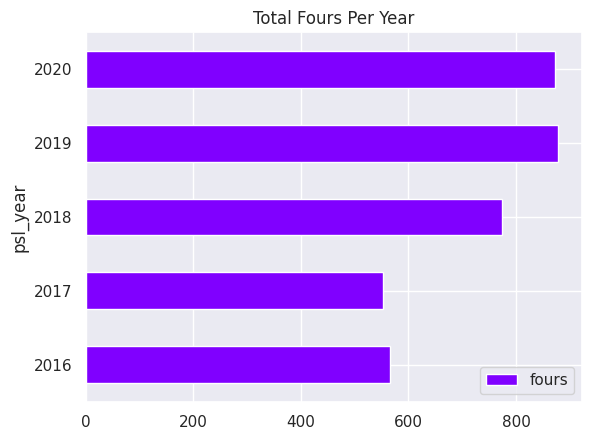

In [8]:
#create a new DataFrame with all the years
all_years = pd.DataFrame({'psl_year': [2016, 2017, 2018, 2019, 2020]})

# merge the new DataFrame with boundries_df
merged_df = pd.merge(all_years, boundries_df, on='psl_year', how='left')


# plot the bar chart with the updated DataFrame
ax = merged_df.plot(x='psl_year', y='fours', title= 'Total Fours Per Year', kind='barh', colormap='rainbow')

## **total_six per year** 

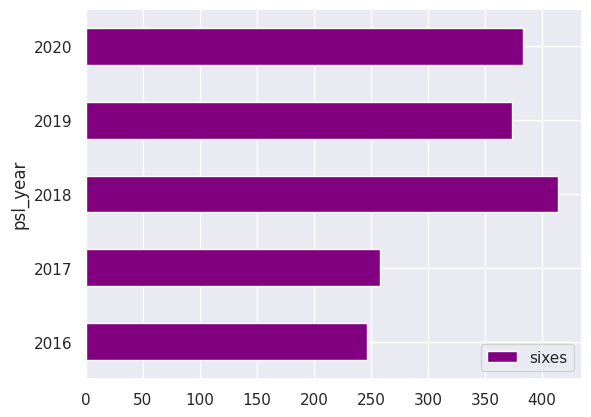

In [9]:
#create a new DataFrame with all the years
all_years = pd.DataFrame({'psl_year': [2016, 2017, 2018, 2019, 2020]})

# merge the new DataFrame with boundries_df
merged_df = pd.merge(all_years, boundries_df, on='psl_year', how='left')


# plot the bar chart with the updated DataFrame
ax = boundries_df.plot('psl_year', 'sixes', kind='barh', color='Purple')

# **Boundaries count PER match** 

In [10]:
# group the DataFrame by the "psl_year" column and aggregate the desired values
boundries_df = df.groupby(['psl_year']).agg(
    fours = ('is_four','sum'),
    sixes = ('is_six','sum'),
    matches = ('match_number','max')
)

# calculate the values of fours per match and sixes per match, and round to whole numbers
boundries_df['fours_per_match'] = round(boundries_df['fours'] / boundries_df['matches'])
boundries_df['sixes_per_match'] = round(boundries_df['sixes'] / boundries_df['matches'])


# reset the index of the DataFrame
boundries_df = boundries_df.reset_index()

# display the resulting DataFrame
#print(boundries_df[['psl_year', 'fours_per_match', 'sixes_per_match']])
boundries_df

,psl_year,fours,sixes,matches,fours_per_match,sixes_per_match
0,2016,566,247,24,24.0,10.0
1,2017,552,258,24,23.0,11.0
2,2018,774,414,34,23.0,12.0
3,2019,878,374,34,26.0,11.0
4,2020,873,383,34,26.0,11.0


### **fours per match**

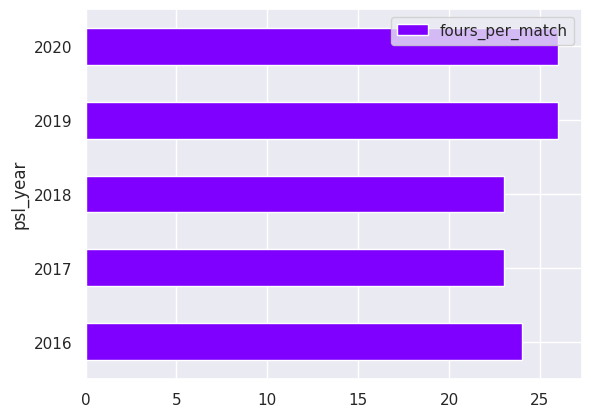

In [11]:
ax = boundries_df.plot('psl_year', 'fours_per_match', kind='barh', colormap='rainbow')

### **total_sixes per Match**

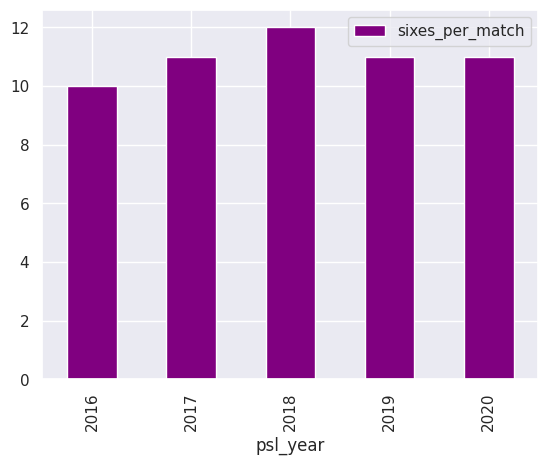

In [12]:
ax = boundries_df.plot('psl_year', 'sixes_per_match', kind='bar',color='Purple')

## From the following graphs it is concluded that

1.   Most fours and fours per match were scored in 2019.

2.   Most sixes and sixes per match were scored in 2018.



## **the total runs scored by each team per over for teams that have played more than 5 matches.**

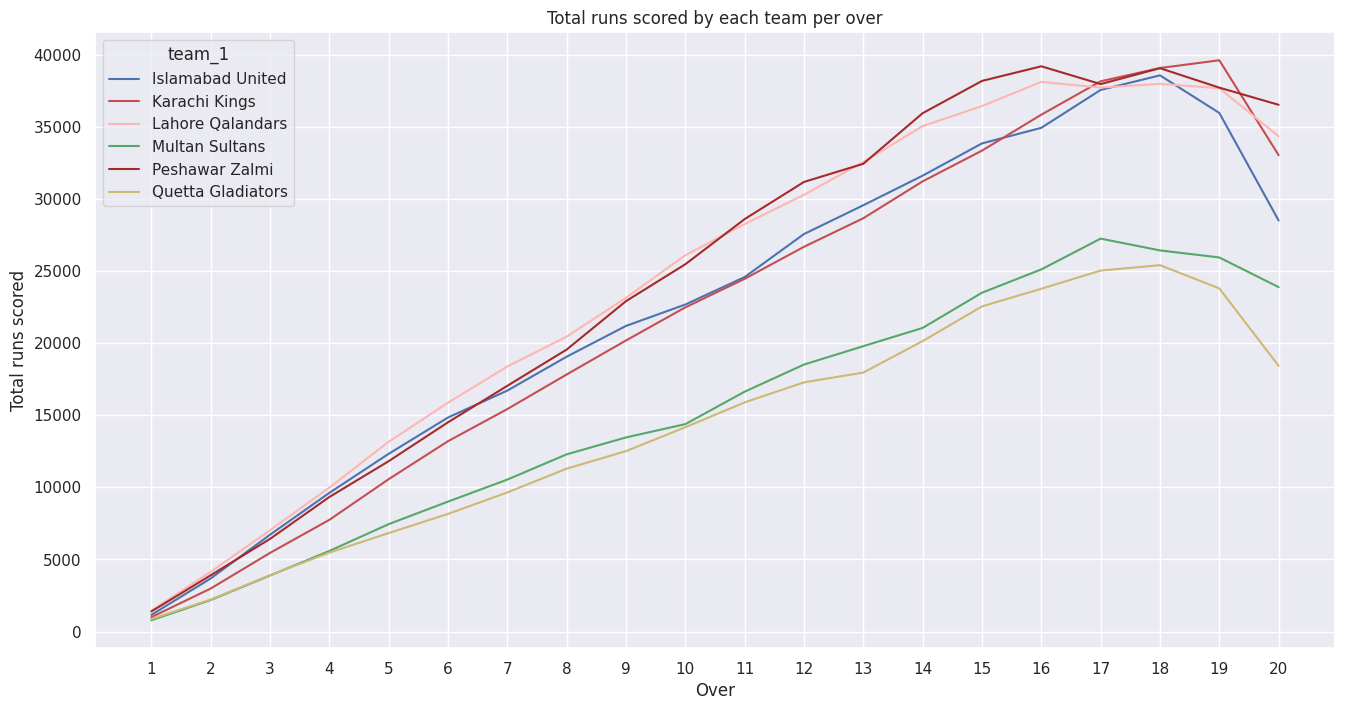

In [ ]:
matches_played_byteams = df.groupby('team_1')['match_number'].nunique() + df.groupby('team_2')['match_number'].nunique()
teams_to_plot = matches_played_byteams[matches_played_byteams > 5].index
colors = ["b", "r", "#Ffb6b2", "g", 'brown', 'y', '#6666ff', 'black', '#FFA500']
runs_per_over[teams_to_plot].plot(color=colors)
x = np.arange(1, 21)
plt.xticks(x)
plt.xlabel('Over')
plt.ylabel('Total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.title('Total runs scored by each team per over')
plt.show()


# **Wickets**

In [13]:
# counts the frequency of each unique value 
wickets = df['wicket_text'].value_counts()
#wicket_dict which contains the count of each type of wicket (bowled, caught, lbw, etc.)
wicket_dict = dict(wickets)
# creates an empty list del_keys that will be used to store the wicket types that occur less frequently than the threshold.
del_keys = []
# counter variable others to zero, which will be used to keep track of the total count of wickets that are grouped into the "others" category.
others = 0
# This loops through each key-value pair in the wicket_dict dictionary.
for key, value in wicket_dict.items(): 
  #: This checks if the value (i.e., count) of the current key (i.e., wicket type) is less than the threshold of 100.
    if value <100:
        others = others+value
        del_keys.append(key)
for del_key in del_keys:
  
    del(wicket_dict[del_key])
wicket_dict['others']= others
wicket_dict
colors = ['m', 'g', 'pink', 'y', 'b', 'r']



<BarContainer object of 5 artists>

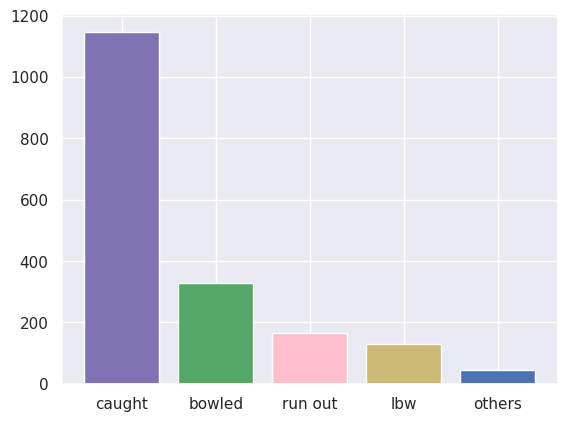

In [14]:
plt.bar(*zip(*wicket_dict.items()),  color=colors)

#### Here, we found an interesting fact that most of the players lost their wickets by getting caught.

# **Team Based Dataframes**

In [15]:
teams_df = {'Quetta' : df.loc[((df['team_1'] == "Quetta Gladiators") & (df['inning'] == 1)) | ((df['team_2'] == "Quetta Gladiators") & (df['inning'] == 2))],
'Lahore' : df.loc[((df['team_1'] == "Lahore Qalandars") & (df['inning'] == 1)) | ((df['team_2'] == "Lahore Qalandars") & (df['inning'] == 2))],
'Islamabad' : df.loc[((df['team_1'] == "Islamabad United") & (df['inning'] == 1)) | ((df['team_2'] == "Islamabad United") & (df['inning'] == 2))],
'Peshawar' : df.loc[((df['team_1'] == "Peshawar Zalmi") & (df['inning'] == 1)) | ((df['team_2'] == "Peshawar Zalmi") & (df['inning'] == 2))],
'Multan' : df.loc[((df['team_1'] == "Multan Sultans") & (df['inning'] == 1)) | ((df['team_2'] == "Multan Sultans") & (df['inning'] == 2))],
'Karachi' : df.loc[((df['team_1'] == "Karachi Kings") & (df['inning'] == 1)) | ((df['team_2'] == "Karachi Kings") & (df['inning'] == 2))]
}


# **Team Based Runs**

In [16]:
# empty dictionary
team_runs = {}
for team_name, value in teams_df.items():
  #calculates the total runs scored by the team 
    team_runs[team_name] = value['runs'].sum()
#empty dictionary     
team_matches = {}
#it calculates the number of matches played by that team 
for team_name , value in teams_df.items():
    team_matches[team_name] = value.groupby(['psl_year', 'match_number']).ngroups

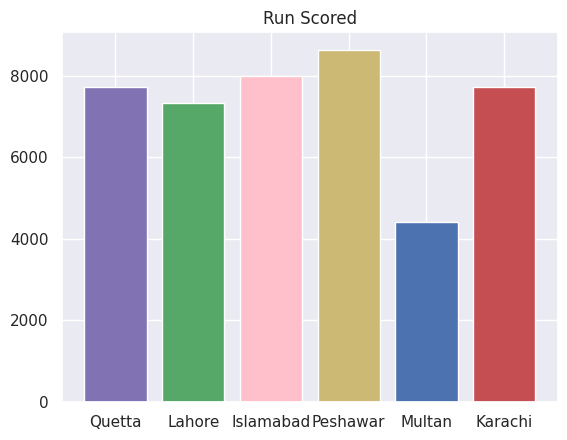

In [17]:
import matplotlib.pyplot as plt

# Calculate runs scored by each team
team_runs = {}
for team_name, value in teams_df.items():
    team_runs[team_name] = value['runs'].sum()

# Create a list of colors for each bar
colors = ['m', 'g', 'pink', 'y', 'b', 'r']

# Create bar chart
plt.bar(team_runs.keys(), team_runs.values(), color=colors)
plt.title("Run Scored")

# Display chart
plt.show()


#### Among all the teams Peshawar scored the most runs, followed by Islamabad United.

# **Team Based Percentage Runs in Boundaries**

In [18]:
#to store the total number of runs scored by each team through boundaries. team name as the key.
team_boundry_runs = {}
for team_name, value in teams_df.items():
    sixes = value['is_six'].sum()
    fours = value['is_four'].sum()
    team_boundry_runs[team_name]= (sixes*6)+(fours*4)
    
# to store the percentage of runs scored by each team through boundaries
boundry_run_percentage = {}
for team, runs in team_runs.items():
#     print (f"{team} scored {(team_boundry_runs[team]/runs)*100}% runs in boundries")
    boundry_run_percentage[team] = (team_boundry_runs[team]/runs)*100

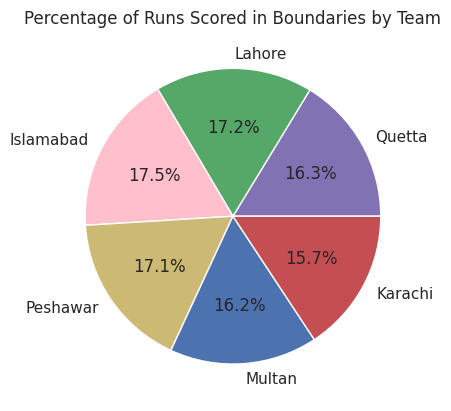

In [19]:
import matplotlib.pyplot as plt

# Calculate percentage of runs scored in boundaries for each team
team_boundry_runs = {}
for team_name, value in teams_df.items():
    sixes = value['is_six'].sum()
    fours = value['is_four'].sum()
    team_boundry_runs[team_name]= (sixes*6)+(fours*4)
#store the percentage of runs scored through boundaries for each team
boundry_run_percentage = {}
for team, runs in team_runs.items():
    boundry_run_percentage[team] = (team_boundry_runs[team]/runs)*100

colors = ['m', 'g', 'pink', 'y', 'b', 'r']


# Create a pie chart with percentage values
plt.pie(boundry_run_percentage.values(), labels=boundry_run_percentage.keys(), autopct='%1.1f%%', colors = colors)

# Add a title to the chart
plt.title('Percentage of Runs Scored in Boundaries by Team')

# Display chart
plt.show()


<BarContainer object of 6 artists>

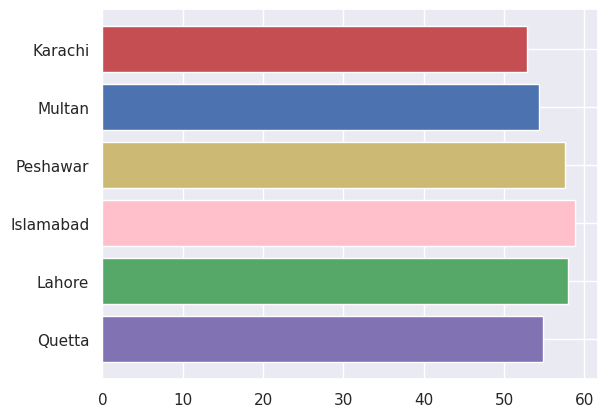

In [20]:
plt.barh(*zip(*boundry_run_percentage.items()),color=colors)

#### This shows that Islamabad United dealt more in boundaries to score the runs.

# Dot Balls Played

In [21]:
#to store the number of dot balls played and the total number of balls played by each team, respectively.
dot_balls_played = {}
total_balls_played = {}
for team, value in teams_df.items():
    dot_balls_played[team]=value[value['runs']==0].shape[0]
    total_balls_played[team]= value.shape[0]

dot_ball_percentage ={}
for team , value in dot_balls_played.items():
    dot_ball_percentage[team] = (value/total_balls_played[team])*100

# for team , value in dot_ball_percentage.items():
#     print (f"Team : {team} played {math.trunc(value)}% of dot balls")

<BarContainer object of 6 artists>

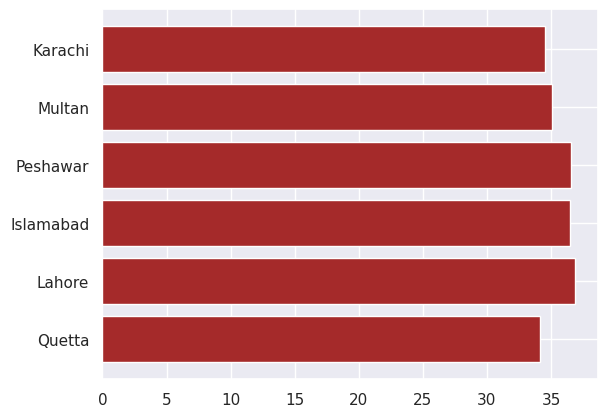

In [22]:
plt.barh(*zip(*dot_ball_percentage.items()), color= 'brown')

#### Here, it shows that Lahore Qalanders played the most Dot balls.

# **Six Hit Per Team**

<BarContainer object of 6 artists>

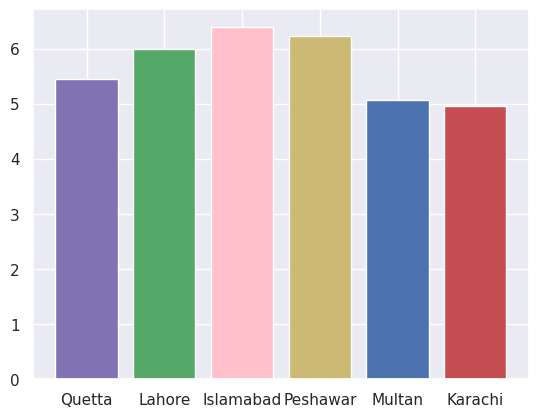

In [23]:
# to store the total number of sixes hit by each team
six_per_team = {}
for team, value in teams_df.items():
    six_per_team[team] = value['is_six'].sum()

six_per_match ={}
for team ,value in six_per_team.items():
    six_per_match[team] = value/team_matches[team]

plt.bar(*zip(*six_per_match.items()),color=colors)

#### Talking about sixes hit by the teams, Islamabad United placed the most sixes per match.

## **Sixes per Team**

<BarContainer object of 6 artists>

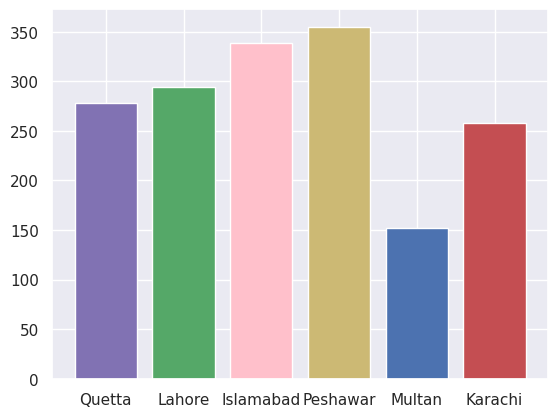

In [24]:
plt.bar(*zip(*six_per_team.items()),color=colors)

#### Talking about sixes hit by the teams, Peshawar Zalmi placed the most sixes per team.

# **Four Hit Per Team**

<BarContainer object of 6 artists>

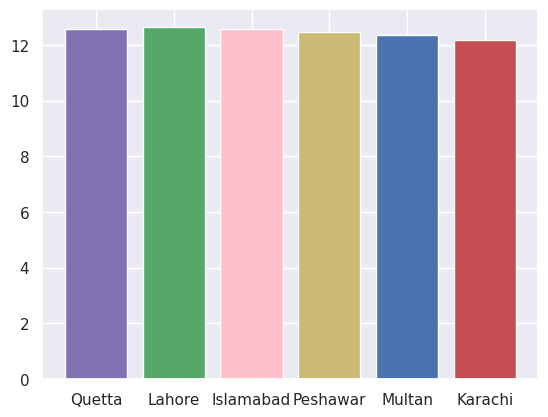

In [25]:
four_per_team = {}
for team, value in teams_df.items():
    four_per_team[team] = value['is_four'].sum()

four_per_match ={}
for team ,value in four_per_team.items():
    four_per_match[team] = value/team_matches[team]

plt.bar(*zip(*four_per_match.items()),color=colors)

#### It seems a coincidence that all the teams scored almost similar number of fours per match.

# **Runs Scored Per Team**

<BarContainer object of 6 artists>

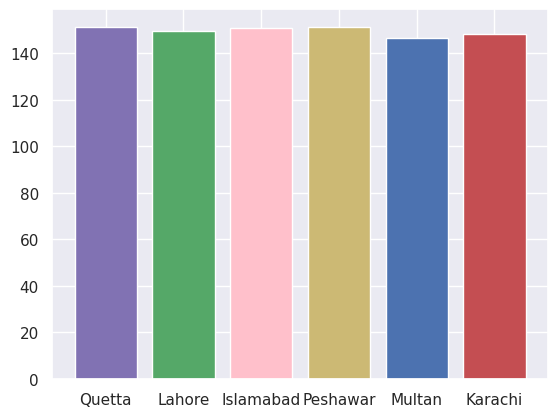

In [26]:
runs_per_team = {}
for team, value in teams_df.items():
    runs_per_team[team] = value['runs'].sum()

runs_per_match ={}
for team ,value in runs_per_team.items():
    runs_per_match[team] = value/team_matches[team]

plt.bar(*zip(*runs_per_match.items()),color=colors)

#### Here, again it seems that all the teams scored almost similar number of runs per match.

# **Wickets Per Team**

<BarContainer object of 6 artists>

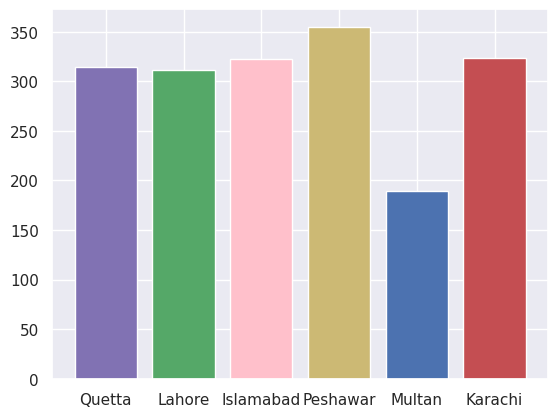

In [27]:
wickets_per_team = {}
for team, value in teams_df.items():
    wickets_per_team[team] = value['is_wicket'].sum()

wickets_per_match ={}
for team ,value in wickets_per_team.items():
    wickets_per_match[team] = value/team_matches[team]

plt.bar(*zip(*wickets_per_team.items()),color=colors)

#### The above barchart shows that, Peshawar Zalmi had the most wickets being fallen per team.

# **Wickets fallen per team**

<BarContainer object of 6 artists>

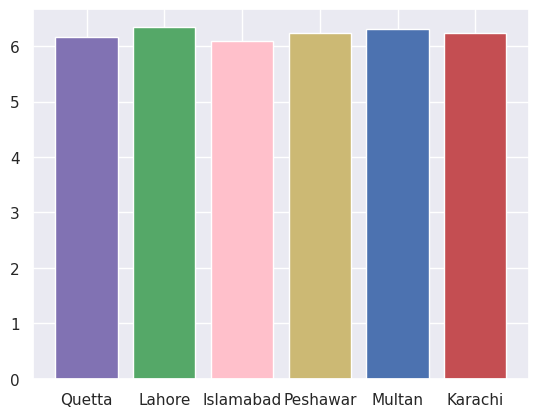

In [28]:
plt.bar(*zip(*wickets_per_match.items()),color=colors)

#### Her the above barchart shows that, Lahore Qalanders had the most wickets being fallen per match.

# **Defining Functions to bulit Prediction Model**

In [29]:
# Method to calculate if the team batting second won or not
def is_winner(row):
    if type(row['result']) == str:
        if row['result'] in row['team_2']:
            return 1
        return 0
    else:
        return 0

In [30]:
# Method to calculate if a player was dismissed on this ball or not
def is_out(row):
    if type(row['player_dismissed']) == str:
        return 1
    else:
        return 0

# **Data Manipulation to Extract Important Features**

In [31]:
# Splitting on Innings
first_inning = df[df['inning']==1]
second_inning = df[df['inning']==2]

In [32]:
# Calculating Target
total_sum = first_inning.groupby(["psl_year","match_number"]).agg(
   target= ("runs","sum")
)

In [44]:
total_sum = total_sum.reset_index()

In [33]:
# Merging the DF
new_df = pd.merge(total_sum, second_inning,  how='left', left_on=['psl_year','match_number'], right_on = ['psl_year','match_number'])

In [34]:
# Calculating if Second Inning team won or not 
new_df['won'] = new_df.apply(is_winner, axis=1)

In [35]:
# Calculating balls left
new_df['balls_left'] = 120-(((new_df['over']-1)*6)+new_df['ball'])

In [36]:
# Creating the Final Dataset
final_df = new_df[['over','ball','total_runs','wickets','target','balls_left','won']]

In [38]:
final_df.head()

,over,ball,total_runs,wickets,target,balls_left,won
0,1.0,1.0,0.0,0.0,128,119.0,1
1,1.0,2.0,0.0,0.0,128,118.0,1
2,1.0,3.0,0.0,0.0,128,117.0,1
3,1.0,4.0,2.0,0.0,128,116.0,1
4,1.0,5.0,2.0,0.0,128,115.0,1


In [39]:
final_df['runs_left'] = final_df['target']- final_df['total_runs']

## **Heat Map**

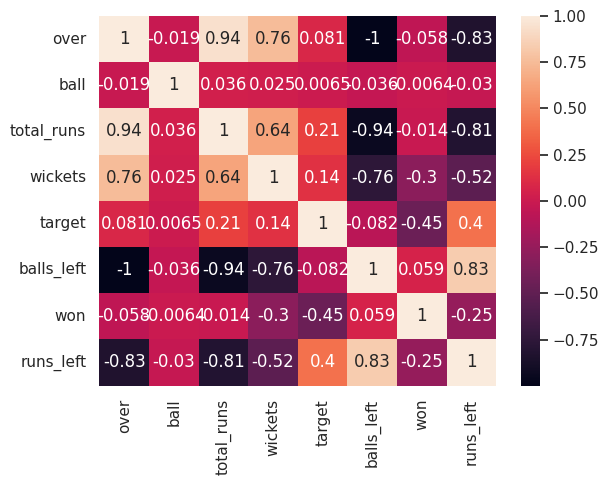

In [40]:
corrMatrix = final_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## **Selecting particular columns for our model**

In [41]:
new_cols =['wickets','balls_left','runs_left','won']

In [42]:
psl_df = final_df[new_cols]
psl_df.head()

,wickets,balls_left,runs_left,won
0,0.0,119.0,128.0,1
1,0.0,118.0,128.0,1
2,0.0,117.0,128.0,1
3,0.0,116.0,126.0,1
4,0.0,115.0,126.0,1


In [43]:
psl_df.isnull().sum()

wickets       2
balls_left    2
runs_left     2
won           0
dtype: int64

In [44]:

psl_df.shape

(16318, 4)

In [45]:
# function to convert all values in the DataFrame to numeric type.
#errors='coerce' parameter tells the function to set any non-numeric values to NaN.
psl_df = psl_df.apply (pd.to_numeric, errors='coerce')
# drops any rows containing NaN values. 
psl_df = psl_df.dropna()

In [46]:
# number of rows and columns
psl_df.shape

(16316, 4)

In [47]:
#y(dependent)=winner
#x(independent)=team
# X and Y Split
y = psl_df.iloc[:,3]
X = psl_df.iloc[:,:3]

In [48]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# **Making predictions with Random Forest Classifier**

*   Random Forest is a type of ensemble learning algorithm, which combines multiple decision trees to improve the accuracy and stability of the model.

*   Random Forest Classifier is a type of Random Forest that is used for classification tasks, where the goal is to predict a categorical target variable.



In [53]:
from sklearn.ensemble import RandomForestClassifier
import joblib

joblib.dump(rf_classifier, 'random_forest_model.joblib')

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

### Accuracy

In [50]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Accuracy:", accuracy*100)

Accuracy: 0.8003677033859353
Accuracy: 80.03677033859353


### Outcome Probability

In [57]:

current_df = pd.DataFrame(current, index=[0])
rf_model = joblib.load('random_forest_model.joblib')

current = {
    "wickets": 6,
    "balls_left": 12,
    "runs_left": 19
}
# Predicting the outcome probabilities using the Random Forest model
outcome_probabilities = rf_model.predict_proba(current_df)

print(outcome_probabilities)


[[0.93833333 0.06166667]]


from the above inights it is concluded:

*   0.9383(93.8%) chances of team 2 winning or team 1 losing

*   0.0616667(6.1%)chance of team 1 winning or team 2 losing



In [63]:

# load the model
rf_model = joblib.load('random_forest_model.joblib')

# TEAM 1 KARACHI HAS TO CHASE THE TARGET
team1 = 'Karachi Kings'
team2 = 'Multan Sultans'
target = 142
cur_runs = 123
wickets = 6.0
overs = 18


# calculate input features
balls_left = 120 - ((overs - overs%1) * 6 + (overs%1)*10)
runs_left = target - cur_runs

# create input data
input_data = pd.DataFrame([[wickets, balls_left, runs_left]], columns=['wickets', 'balls_left', 'runs_left'])

# make prediction
prediction = rf_model.predict_proba(input_data)[:, 1]

# display results
print(f"Interpretation: There is a {round(prediction[0] * 100)}% chance ({team2}) is going to lose [or  ({team1}) is going to win] and a {round((1-prediction[0]) * 100)}% chance that ({team2}) will win.")


Interpretation: There is a 6% chance (Multan Sultans) is going to lose [or  (Karachi Kings) is going to win] and a 94% chance that (Multan Sultans) will win.


From the interprepretion it is concluded that above insights are true

In [75]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

print("                -----CLASSIFICATION REPORT----\n")
# predict target values on the testing data
y_pred_test = rf_classifier.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred_test))

                -----CLASSIFICATION REPORT----

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2470
           1       0.83      0.85      0.84      4057

    accuracy                           0.80      6527
   macro avg       0.79      0.78      0.79      6527
weighted avg       0.80      0.80      0.80      6527



In [62]:
from sklearn.metrics import confusion_matrix

# assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(cm)


Confusion matrix:
[[1764  706]
 [ 597 3460]]


# **Making predictions with SVM**
SVM stands for Support Vector Machines, which is a type of supervised learning algorithm used for classification and regression analysis.

In [64]:
from sklearn import svm
import joblib

# create SVM classifier object
svm_classifier = svm.SVC(kernel='linear')

# train the model using training sets
svm_classifier.fit(X_train, y_train)

# dump the model using joblib
joblib.dump(svm_classifier, 'svm_model.joblib')


['svm_model.joblib']

In [65]:
# Save the trained model
joblib.dump(svm_classifier, 'svm_model.joblib')

# Predict the labels of the test data using the trained model
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Accuracy:", accuracy*100)

Accuracy: 0.7851999387161024
Accuracy: 78.51999387161024


In [137]:
current= {
    "wickets":6,
    "balls_left" :12,
    "runs_left":19
}
current_df = pd.DataFrame(current,index=[0])
svm_model.predict_proba(current_df)

array([[0.464123, 0.535877]])

from the insights it is concluded:


1.   There are 0.4641(46.41%) chances of team2is going to win or team 1 is going to lose
2.   There are 0.53578(53.58%) chances of team1 is going to win or team 2 is going to lose



In [76]:
# load the model
svm_model = joblib.load('svm_model.joblib')

# TEAM 1 KARACHI HAS TO CHASE THE TARGET
team1 = 'Karachi Kings'
team2 = 'Multan Sultans'
target = 142
cur_runs = 123
wickets = 6.0
overs = 18

# calculate input features
balls_left = 120 - ((overs - overs%1) * 6 + (overs%1)*10)
runs_left = target - cur_runs

# create input data
input_data = pd.DataFrame([[wickets, balls_left, runs_left]], columns=['wickets', 'balls_left', 'runs_left'])

# make prediction using decision function
scores = svm_model.decision_function(input_data)
probabilities = 1 / (1 + np.exp(-scores))

# display results
print(f"Interpretation: There is a {round(probabilities[0] * 100)}% chance ({team2}) is going to lose [or  ({team1}) is going to win] and a {round((1-probabilities[0]) * 100)}% chance that ({team2}) will win.")


Interpretation: There is a 54% chance (Multan Sultans) is going to lose [or  (Karachi Kings) is going to win] and a 46% chance that (Multan Sultans) will win.


In [133]:
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

print("-------CLASSIFICATION REPORT-----\n")

y_pred_test = svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred_test))



-------CLASSIFICATION REPORT-----

              precision    recall  f1-score   support

           0       0.76      0.64      0.69      2470
           1       0.80      0.88      0.84      4057

    accuracy                           0.79      6527
   macro avg       0.78      0.76      0.76      6527
weighted avg       0.78      0.79      0.78      6527



# **Making predictions with XGBoost Classifier**
1. XGBoost Classifier is an implementation of gradient boosting algorithm which uses multiple decision trees to make predictions.

2. It builds an ensemble of weak decision trees and combines them to make accurate predictions.

3. The algorithm works by iteratively training decision trees to correct the errors of previous trees in the ensemble.

In [103]:
XGBC = xgboost.XGBClassifier()
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [78]:
import xgboost as xgb
import joblib

# create XGBoost classifier object
xgb_classifier = xgb.XGBClassifier()

# train the model using training sets
xgb_classifier.fit(X_train, y_train)

# dump the model using joblib
joblib.dump(xgb_classifier, 'xgb_model.joblib')


['xgb_model.joblib']

In [104]:
y_pred = XGBC.predict(X_test)
predictions = [round(value) for value in y_pred]

In [79]:
# load the model
xgb_model = joblib.load('xgb_model.joblib')

# make prediction
y_pred = xgb_model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy:", accuracy*100)


Accuracy: 0.8113988049639957
Accuracy: 81.13988049639957


In [108]:
current= {
    "wickets":6,
    "balls_left" :12,
    "runs_left":19
}
current_df = pd.DataFrame(current,index=[0])
XGBC.predict_proba(current_df)

array([[0.7840582 , 0.21594182]], dtype=float32)

from the above insights it is concluded 


1.   there are 0.7840(78.40%) chances of team2 winning or team 1 losing.
2.   there are 0.215941(21.59%) chances of team1 winning or team 2 losing.



In [100]:
import joblib
import pandas as pd
import numpy as np

xgb_model = joblib.load('xgb_model.joblib')
# load the model

# input data
team1 = 'Karachi Kings'
team2 = 'Multan Sultans'
target = 142
cur_runs = 123
wickets = 6.0
overs = 18

# calculate input features
balls_left = 120 - ((overs - overs%1) * 6 + (overs%1)*10)
runs_left = target - cur_runs

# create input data
input_data = pd.DataFrame([[wickets, balls_left, runs_left]], columns=['wickets', 'balls_left', 'runs_left'])

# make prediction
outcome_probabilities = xgb_model.predict(current_array)

# display results
print(f"Interpretation: There is a {round(prediction[0] * 100)}% chance ({team2}) is going to lose [or  ({team1}) is going to win] and a {round((1-prediction[0]) * 100)}% chance that ({team2}) will win.")


Interpretation: There is a 22% chance (Multan Sultans) is going to lose [or  (Karachi Kings) is going to win] and a 78% chance that (Multan Sultans) will win.


In [111]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      2470
           1       0.82      0.89      0.85      4057

    accuracy                           0.81      6527
   macro avg       0.81      0.79      0.79      6527
weighted avg       0.81      0.81      0.81      6527



# **MAKING PREDICTION WITH DECISION TREE**
1. A decision tree is a type of supervised learning algorithm that can be used for both classification and regression tasks. 

2. A decision tree is constructed by recursively splitting the data into subsets based on the values of a certain feature or attribute.

In [116]:
from sklearn.tree import DecisionTreeClassifier
import joblib

# Define model
dt = DecisionTreeClassifier(max_depth=6, random_state=0)

# Fit model
dt.fit(X_train, y_train)

# Dump model into file
joblib.dump(dt, 'decision_tree_model.joblib')


['decision_tree_model.joblib']

In [119]:
dt = joblib.load('decision_tree_model.joblib')

# Predict Output
y_pred_test = dt.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Accuracy:", accuracy*100)

Accuracy: 0.8113988049639957
Accuracy: 81.13988049639957


In [132]:
from sklearn.tree import DecisionTreeClassifier
import joblib
import numpy as np

# Define the input data as a NumPy array
current = {
    "wickets": 6,
    "balls_left": 12,
    "runs_left": 19
}
current_array = np.array([current["wickets"], current["balls_left"], current["runs_left"]])

# Reshape the input array to have two dimensions
current_array = current_array.reshape(1, -1)

# Load the Decision Tree model
dt = joblib.load('decision_tree_model.joblib')

# Predict the probability estimates for each class using the predict_proba() method
outcome_probabilities = dt.predict_proba(current_array)

# Print the predicted probability estimates for each class
print(outcome_probabilities)


[[0.71428571 0.28571429]]


from the above insights it is concluded

1. there are 0.71428(71.42%) chances of team2 winning or team 1 losing.
2. there are 0.2857141(28.57%) chances of team1 winning or team 2 losing.

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define and fit model
dt = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("                 ------CLASSIFICATION REPORT--------")
print(report)


                 ------CLASSIFICATION REPORT--------
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2470
           1       0.83      0.80      0.81      4057

    accuracy                           0.77      6527
   macro avg       0.76      0.76      0.76      6527
weighted avg       0.78      0.77      0.77      6527



In [129]:
dt = joblib.load('decision_tree_model.joblib')

#TEAM 1 KARACHI HAS TO CHASE THE TARGET
team1 = 'Karachi Kings'
team2 = 'Multan Sultans'
target = 142
cur_runs = 123
wickets = 6.0
overs = 18

#calculate input features
balls_left = 120 - ((overs - overs%1) * 6 + (overs%1)*10)
runs_left = target - cur_runs

#reate input data
input_data = pd.DataFrame([[wickets, balls_left, runs_left]], columns=['wickets', 'balls_left', 'runs_left'])

#make prediction
prediction = dt.predict_proba(input_data)[:, 1]

#display results
print(f"Interpretation: There is a {round(prediction[0] * 100)}% chance ({team2}) is going to lose [or ({team1}) is going to win] and a {round((1-prediction[0]) * 100)}% chance that ({team2}) will win.")

Interpretation: There is a 29% chance (Multan Sultans) is going to lose [or (Karachi Kings) is going to win] and a 71% chance that (Multan Sultans) will win.




1. Based on the given performance metrics, the XGBoost Classifier (XGBC) and Random Forest Classifier have the highest accuracy among the models evaluated.

2. Looking at the precision, recall, and F1-score for both classes, the XGBoost Classifier (XGBC) has the highest scores for the positive class (1) compared to the Random Forest Classifier, which has slightly lower scores. The XGBC model also has a higher F1-score for the negative class (0), indicating better overall performance.

3. The SVM and Decision Tree models have lower accuracy and F1-scores compared to XGBC and Random Forest. The Decision Tree model also shows signs of overfitting, as it has a higher accuracy score on the training data than on the test data.

4. Therefore, based on the overall evaluation of performance metrics, the XGBoost Classifier (XGBC) is the best model among the given models for the classification task at hand. It achieved the highest scores for precision, recall, and F1-score, indicating better overall performance.


